## Plotting in Pandas

Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set some Pandas options
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 20)
# pd.set_option('display.max_rows', 25)

<AxesSubplot:>

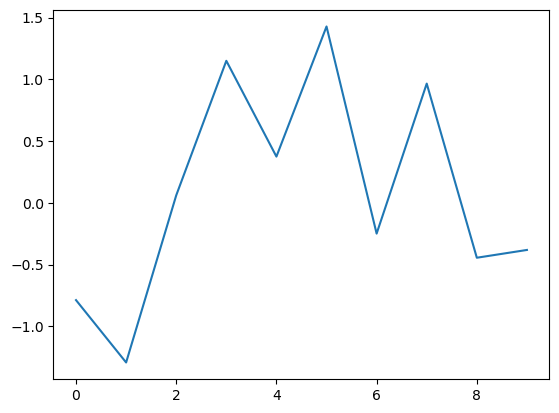

In [2]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

For a dataframe

<AxesSubplot:>

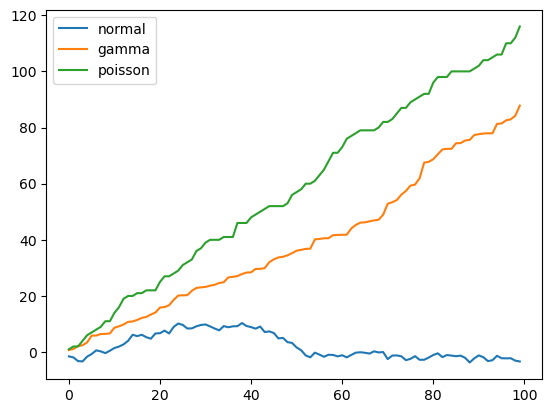

In [3]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for plot:

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

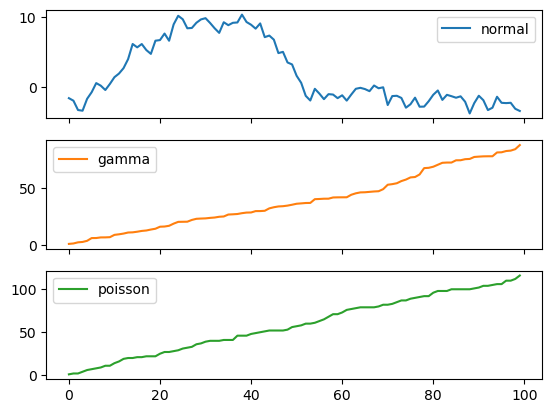

In [4]:
variables.cumsum(0).plot(subplots=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:


<AxesSubplot:>

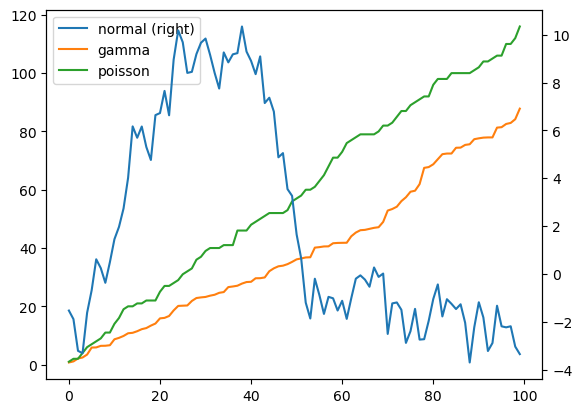

In [5]:
variables.cumsum(0).plot(secondary_y='normal')

If we would like a little more control, we can use matplotlib's subplots function directly, and manually assign plots to its axes:

Text(0, 0.5, 'cumulative sum')

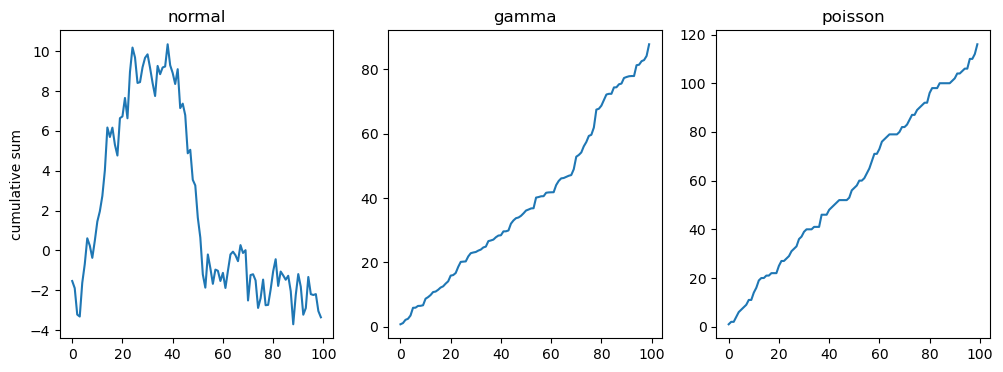

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

For labeled, non-time series data, you may wish to produce a bar plot:

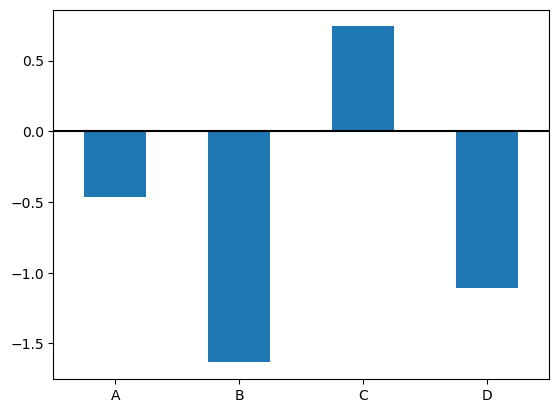

In [7]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df.iloc[5].plot(kind='bar', rot=0)
plt.axhline(0, color='k')

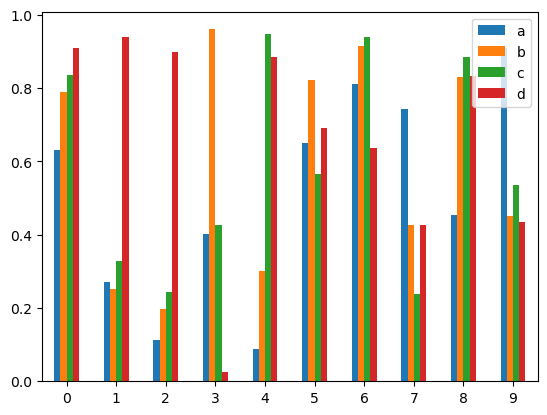

In [8]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='bar', rot=0);

#### Stacked

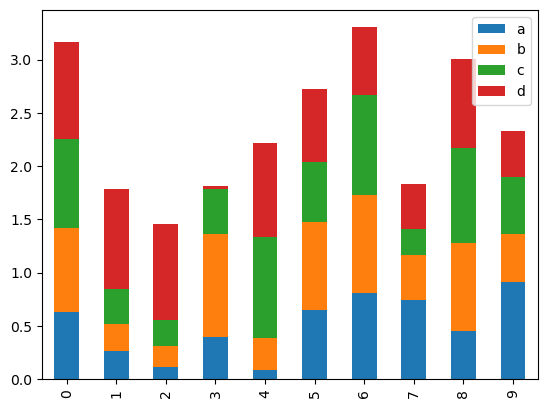

In [9]:
df2.plot(kind='bar', stacked=True);

#### Histogram

In [10]:
print (pd.__version__)

1.4.4


<AxesSubplot:ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

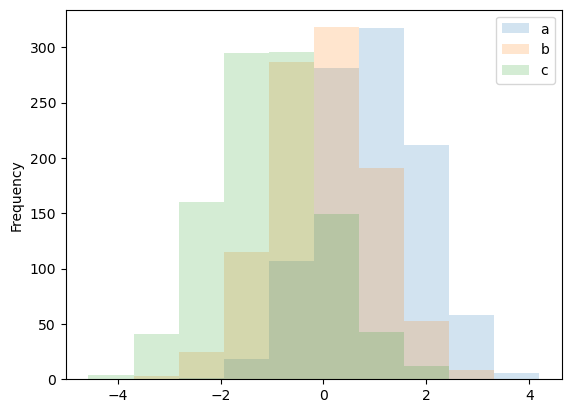

In [11]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure()
df4.plot(kind='hist', alpha=.2)

<AxesSubplot:ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

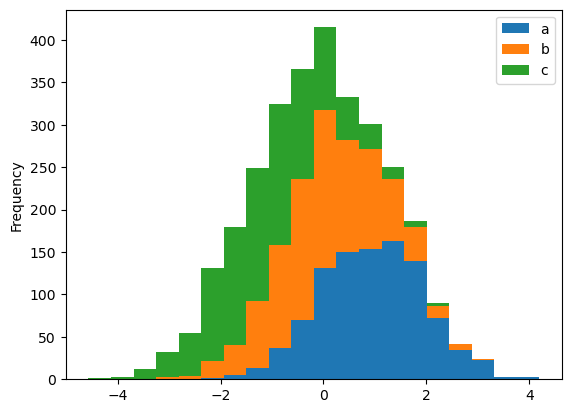

In [12]:
plt.figure()

df4.plot(kind='hist', stacked=True, bins=20)

#### Box Plots

<AxesSubplot:>

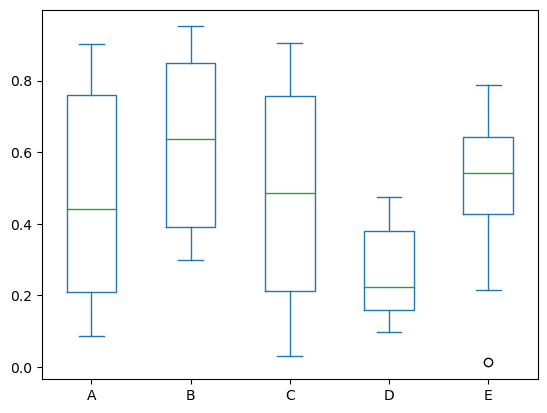

In [13]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.plot(kind='box')

#### Area

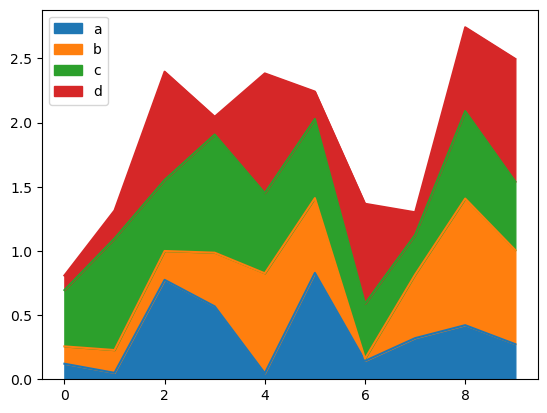

In [14]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot(kind='area');

#### Scatter

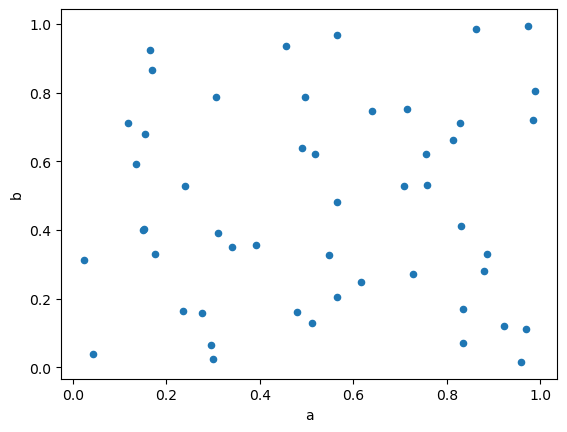

In [15]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

df.plot(kind='scatter', x='a', y='b');


#### Pie

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

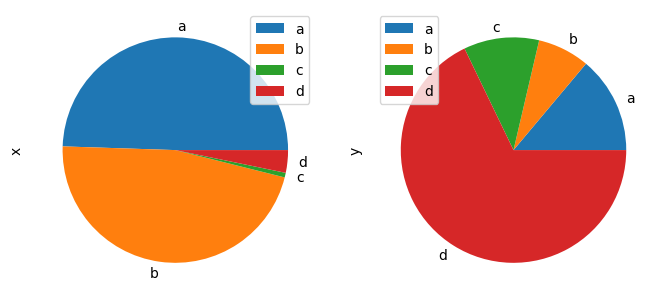

In [16]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

df.plot(kind='pie', subplots=True, figsize=(8, 4))

#### Kernel Density Estimation - KDE

<AxesSubplot:ylabel='Density'>

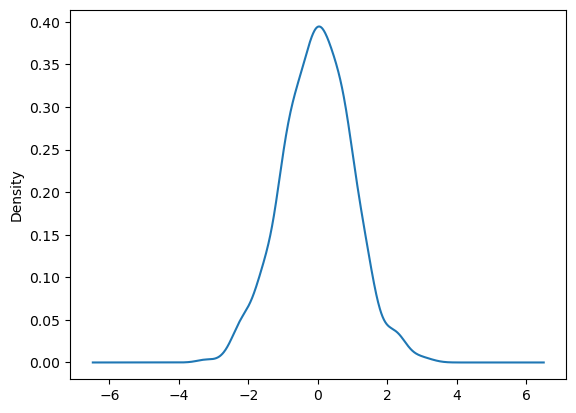

In [17]:
ser = pd.Series(np.random.randn(1000))

ser.plot(kind='kde')

#### Scatter Matrix

array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

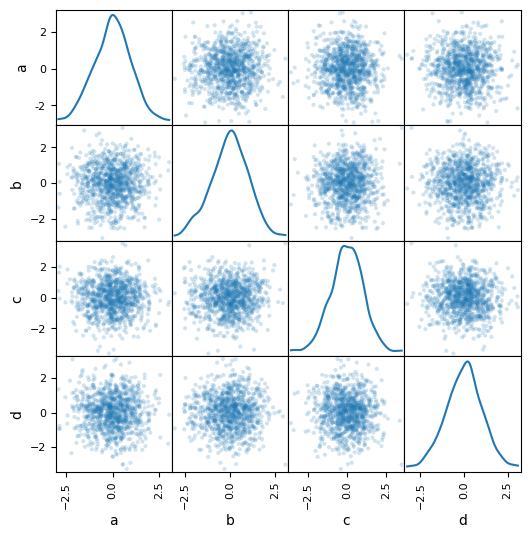

In [18]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

## Plotly, seaborn

Plotly is collaborative, makes beautiful interactive graphs with a URL for you, and stores your data and graphs together. This NB shows how to use Plotly to share plots from some awesome Python plotting libraries. 

For best results, you can copy and paste this Notebook and key. Run `$ pip install plotly` inside a terminal then start up a Notebook. We'll also be using ggplot, seaborn, and prettyplotlib, which you can also all install form pip. Let's get started.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import numpy as np

You can sign up for an account on Plotly. Plotly is free for public use, you own your data, and you control the privacy. 

In [20]:
!pip install plotly
!pip install chart_studio
!pip install credentials
import chart_studio
import chart_studio.plotly as py

import plotly.tools as tls
from plotly.graph_objs import *
from credentials import *


#https://chart-studio.plotly.com/settings/api#/   
#creat your own account
username =     # type in your username
key =         # type in your key
py.sign_in(username, key)

In [21]:
#tls.set_credentials_file(username, key)
#tls.get_credentials_file()

You'll want to have version 1.0.0. If not, run `$ pip install plotly --upgrade` in a terminal. Check out our User Guide for more details on [where to get your key](http://nbviewer.ipython.org/github/plotly/python-user-guide/blob/master/s00_homepage/s00_homepage.ipynb#Installation-guidelines). Problems or questions? Email feedback@plot.ly or find us on [Twitter](https://twitter.com/plotlygraphs).

In [22]:
import plotly
plotly.__version__

'5.9.0'

## I. Plotly graphs

For matplotlib experts, you'll recognize these graphs from the [matplotlib gallery](matplotlib.org/gallery.html). 

In addition to matplotlib and Plotly's own [Python API](https://plot.ly/python), You can also use Plotly's other [APIs](https://plot.ly/api) for MATLAB, R, Perl, Julia, and REST to write to graphs. That means you and I could edit the same graph with any language. We can even edit the graph and data from the GUI, so technical and non-technical teams can work together. And all the graphs go to your profile, like this: https://plot.ly/~IPython.Demo.

You control [the privacy](http://plot.ly/python/privacy) by setting `world_readable` to False or True, and can control your [sharing](http://plot.ly/python/file-sharing).

Let's get started with this [damped oscillation](http://matplotlib.org/examples/pylab_examples/legend_demo2.html) graph.

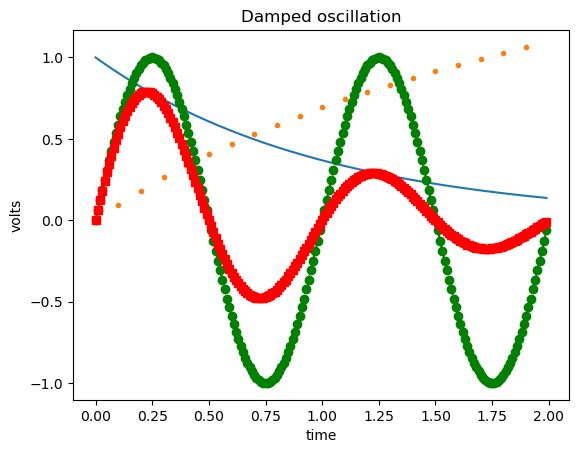

In [23]:
fig1 = plt.figure()
# Make a legend for specific lines.
import matplotlib.pyplot as plt
import numpy as np


t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(t2, np.exp(-t2))
l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', t1, np.log(1 + t1), '.')
l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.')

plt.xlabel('time')
plt.ylabel('volts')
plt.title('Damped oscillation')

plt.show()

Now, to convert it to a Plotly figure, this is all it takes:

In [24]:
py.iplot_mpl(fig1)

You can add lengend to the plot.

In [25]:
fig = tls.mpl_to_plotly(fig1)
fig['data'][0]['name'] = 'line 0'
fig['data'][1]['name'] = 'line 1'
fig['data'][2]['name'] = 'line 2'
fig['data'][3]['name'] = 'line 3'
fig['layout'].update(showlegend=True)
py.iplot(fig)

Next up, an example from [pylab](http://matplotlib.org/examples/pylab_examples/arctest.html).

In [26]:
fig2 = plt.figure()

from pylab import *

def f(t):
    'a damped exponential'
    s1 = cos(2*pi*t)
    e1 = exp(-t)
    return multiply(s1,e1)

t1 = arange(0.0, 5.0, .2)


l = plot(t1, f(t1), 'ro')
setp(l, 'markersize', 30)
setp(l, 'markerfacecolor', 'b')

py.iplot_mpl(fig2)

You can get the data from any Plotly graph. That means you can re-plot the graph or part of it, or use your favorite Python tools to wrangle and analyze your data. 

In [27]:
print(fig)

Figure({
    'data': [{'line': {'color': 'rgba (31, 119, 180, 1)', 'dash': 'solid', 'width': 1.5},
              'mode': 'lines',
              'name': 'line 0',
              'type': 'scatter',
              'x': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                    0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
                    0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3,
                    0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38,
                    0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46,
                    0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54,
                    0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62,
                    0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001,
                    0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
                    0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.830000000000

You can also plot with Plotly with pandas, NumPy, datetime, and more of your favorite Python tools. We've already imported numpy and matplotlib; here we've kept them in so you can simply copy and paste these examples into your own NB. 

In [28]:
fig3 = plt.figure()

import numpy as np
import matplotlib.pyplot as plt

# make a little extra space between the subplots
plt.subplots_adjust(wspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same')*dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same')*dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01*np.sin(2*np.pi*10*t) + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t) + cnse2

plt.subplot(211)
plt.plot(t, s1, 'b-', t, s2, 'g-')
plt.xlim(0,5)
plt.xlabel('time')
plt.ylabel('s1 and s2')
plt.grid(True)

plt.subplot(212)
cxy, f = plt.csd(s1, s2, 256, 1./dt)
plt.ylabel('CSD (db)')

py.iplot_mpl(fig3)

/Users/tutu/opt/anaconda3/lib/python3.9/site-packages/plotly/matplotlylib/renderer.py:647: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



Another subplotting example using Plotly's defaults. 

In [29]:
fig4 = plt.figure()

from pylab import figure, show
from numpy import arange, sin, pi

t = arange(0.0, 1.0, 0.01)

fig = figure(1)

ax1 = fig.add_subplot(211)
ax1.plot(t, sin(2*pi*t))
ax1.grid(True)
ax1.set_ylim( (-2,2) )
ax1.set_ylabel('1 Hz')
ax1.set_title('A sine wave or two')

for label in ax1.get_xticklabels():
    label.set_color('r')


ax2 = fig.add_subplot(212)
ax2.plot(t, sin(2*2*pi*t))
ax2.grid(True)
ax2.set_ylim( (-2,2) )
l = ax2.set_xlabel('Hi mom')
l.set_color('g')
l.set_fontsize('large')

py.iplot_mpl(fig4, strip_style = True)

# II. Plotting with seaborn

Another library we really dig is [seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html), a library to maximize aesthetics of matplotlib plots. It's by by [Michael Waskom](http://stanford.edu/~mwaskom/). You'll need to install it with ` $ pip install seaborn`, and may need to [import six](http://stackoverflow.com/questions/13967428/importerror-no-module-named-six), which you can do from pip. The styling isn't yet translated to Plotly, so we'll go to Plotly's default settings. 

In [30]:
import seaborn as sns

In [31]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

In [32]:
fig14 = plt.figure()

sns.set_style("dark")
sinplot()

py.iplot_mpl(fig14, strip_style = True)

You can also run subplots like this.

In [34]:
fig15 = plt.figure()

with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

py.iplot_mpl(fig15, strip_style = True)

And a final example, [combining plot types](http://stanford.edu/~mwaskom/software/seaborn/tutorial/plotting_distributions.html#basic-visualization-with-histograms).

In [111]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
fig16 = plt.figure()

sns.set_palette("hls")
mpl.rc("figure", figsize=(8, 4))
data = randn(200)
sns.distplot(data);

py.iplot_mpl(fig16, strip_style = True)

/Users/tutu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

